Tạo list tên các files nằm trong một thư mục. Ở đây các file đặt trong thư mục C:\\Users\\htra8681\\Desktop\\Software Carpentry\Data.

In [7]:
import glob #import thư viện có tên glob

In [8]:
pwd #Kiểm tra thư mục hiện thời

'C:\\Users\\htra8681\\Desktop\\Software Carpentry'

In [5]:
filenames=glob.glob('Data/*.csv') # Tạo list có tên filenames

In [6]:
print(filenames)

['Data\\inflammation-01.csv', 'Data\\inflammation-02.csv', 'Data\\inflammation-03.csv', 'Data\\inflammation-04.csv', 'Data\\inflammation-05.csv', 'Data\\inflammation-06.csv', 'Data\\inflammation-07.csv', 'Data\\inflammation-08.csv', 'Data\\inflammation-09.csv', 'Data\\inflammation-10.csv', 'Data\\inflammation-11.csv', 'Data\\inflammation-12.csv', 'Data\\small-01.csv', 'Data\\small-02.csv', 'Data\\small-03.csv']


In [9]:
len(filenames) #Xem có bao nhiêu file trong list

15

Sắp xếp các file trong list "filenames" vừa tạo theo thứ tự 

In [12]:
filenames_sort=sorted(filenames)
print(filenames_sort)

['Data\\inflammation-01.csv', 'Data\\inflammation-02.csv', 'Data\\inflammation-03.csv', 'Data\\inflammation-04.csv', 'Data\\inflammation-05.csv', 'Data\\inflammation-06.csv', 'Data\\inflammation-07.csv', 'Data\\inflammation-08.csv', 'Data\\inflammation-09.csv', 'Data\\inflammation-10.csv', 'Data\\inflammation-11.csv', 'Data\\inflammation-12.csv', 'Data\\small-01.csv', 'Data\\small-02.csv', 'Data\\small-03.csv']


In [16]:
filenames_sort[0:3] #Kiểm tra thứ tự file trong list

['Data\\inflammation-01.csv',
 'Data\\inflammation-02.csv',
 'Data\\inflammation-03.csv']

Tách các file thành 2 nhóm theo tên file: Nhóm các file inflamation... và nhóm các file có tên small....

Cách 1: trích xuất từ list 'filenames_sort'

In [20]:
group_small=filenames_sort[12:15]
print(group_small)

['Data\\small-01.csv', 'Data\\small-02.csv', 'Data\\small-03.csv']


In [21]:
group_inflamation=filenames_sort[0:12]
print(group_inflamation)

['Data\\inflammation-01.csv', 'Data\\inflammation-02.csv', 'Data\\inflammation-03.csv', 'Data\\inflammation-04.csv', 'Data\\inflammation-05.csv', 'Data\\inflammation-06.csv', 'Data\\inflammation-07.csv', 'Data\\inflammation-08.csv', 'Data\\inflammation-09.csv', 'Data\\inflammation-10.csv', 'Data\\inflammation-11.csv', 'Data\\inflammation-12.csv']


Cách 2: Dùng lệnh glob.glob kết hợp với tên file

In [23]:
group_inflamation_2=glob.glob('Data/inflammation*.csv')
print(group_inflamation_2)

['Data\\inflammation-01.csv', 'Data\\inflammation-02.csv', 'Data\\inflammation-03.csv', 'Data\\inflammation-04.csv', 'Data\\inflammation-05.csv', 'Data\\inflammation-06.csv', 'Data\\inflammation-07.csv', 'Data\\inflammation-08.csv', 'Data\\inflammation-09.csv', 'Data\\inflammation-10.csv', 'Data\\inflammation-11.csv', 'Data\\inflammation-12.csv']


In [24]:
group_small_2=glob.glob('Data/sm*.csv')
print(group_small_2)

['Data\\small-01.csv', 'Data\\small-02.csv', 'Data\\small-03.csv']


Phân tích dữ liệu các files trong nhóm group_inflammation sử dụng lệnh lặp for

data\inflammation-01.csv


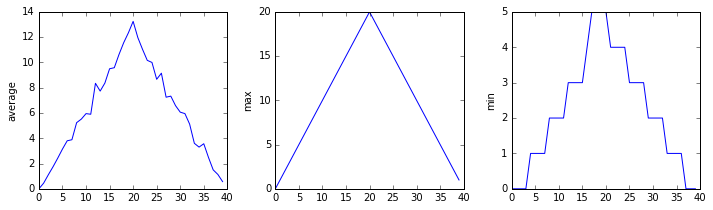

data\inflammation-02.csv


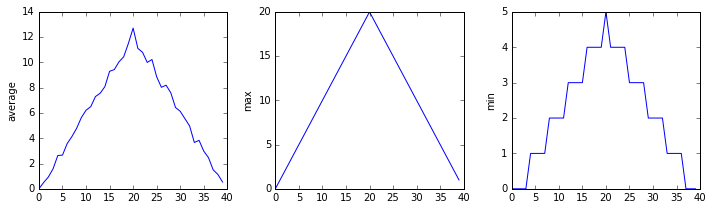

In [27]:
%matplotlib inline
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames_cal = filenames[0:2] # chỉ phân tích 2 file đầu trong nhóm
for f in filenames_cal:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

In [ ]:
Phân tích các file trong nhóm small

Data\small-01.csv


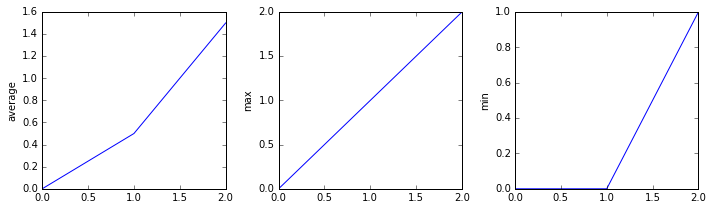

Data\small-02.csv


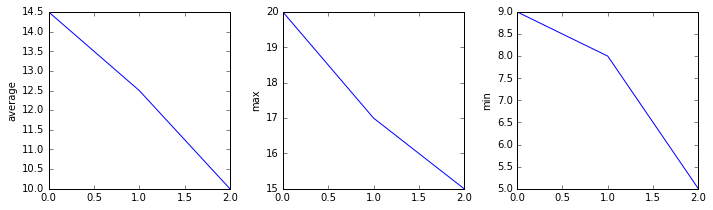

In [28]:
#filenames = sorted(glob.glob('data/small*.csv'))
filenames_cal = group_small[0:2] # chỉ phân tích 2 file đầu trong nhóm
for f in filenames_cal:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

So sánh sự khác nhau về kết quả trong hai file bất kỳ trong nhóm file

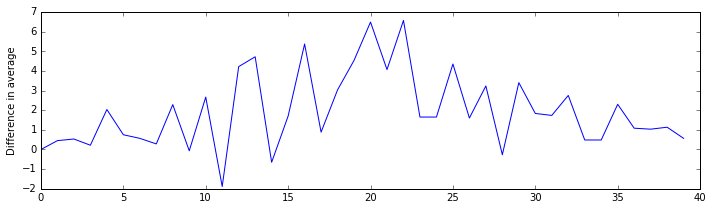

In [30]:
filenames = glob.glob('data/inflammation*.csv')

data0 = numpy.loadtxt(fname=filenames[0], delimiter=',')
data1 = numpy.loadtxt(fname=filenames[10], delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

matplotlib.pyplot.ylabel('Difference in average')
matplotlib.pyplot.plot(data0.mean(axis=0) - data1.mean(axis=0))

fig.tight_layout()
matplotlib.pyplot.show()

Tao file dữ liệu là trung bình của các file trong nhóm

In [32]:
filenames = glob.glob('data/inflammation*.csv')
composite_data = numpy.zeros((60,40))
for f in filenames:
    # sum each new file's data into as it's read
    composite_data=composite_data+numpy.loadtxt(fname=filenames[0], delimiter=',') 
    # and then divide the composite_data by number of samples
composite_data=composite_data/len(filenames)

print(composite_data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


Kiểm tra dữ liệu các file sử dụng lệnh for

In [36]:
filenames=glob.glob('data/*.csv')
for x in filenames:
    print(x)
    
    data = numpy.loadtxt(fname=x, delimiter=',')
    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

data\inflammation-01.csv
Suspicious looking maxima!
data\inflammation-02.csv
Suspicious looking maxima!
data\inflammation-03.csv
Minima add up to zero!
data\inflammation-04.csv
Suspicious looking maxima!
data\inflammation-05.csv
Suspicious looking maxima!
data\inflammation-06.csv
Suspicious looking maxima!
data\inflammation-07.csv
Suspicious looking maxima!
data\inflammation-08.csv
Minima add up to zero!
data\inflammation-09.csv
Suspicious looking maxima!
data\inflammation-10.csv
Suspicious looking maxima!
data\inflammation-11.csv
Minima add up to zero!
data\inflammation-12.csv
Suspicious looking maxima!
data\small-01.csv


IndexError: index 20 is out of bounds for axis 0 with size 3